INFO:root:{'LOG_LEVEL': 'INFO', 'number_of_agents': 10, 'problem': 'Rastrigin', 'problem_size': 90, 'communication_type': 'temp2', 'communication_operator': 'average', 'max_time': 800, 'enable_plots': True, 'trust': 'global', 'population size': 5, 'offspring size': 15}
INFO:root:Socjo started
Progress: 216005it [03:28, 1036.73it/s]                            
INFO:root:Socjo finished in 5.195109041531881
Progress: 216005it [00:18, 11528.33it/s]                            
INFO:root:comparison finished in 4.652082002162933
INFO:root:best socjo 45.166326978542585 best single 40.14775470830688


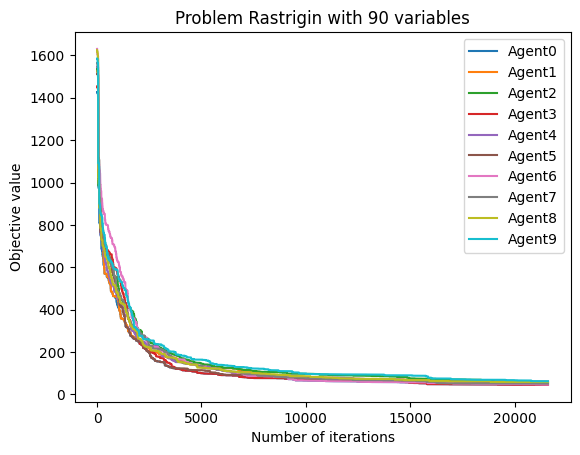

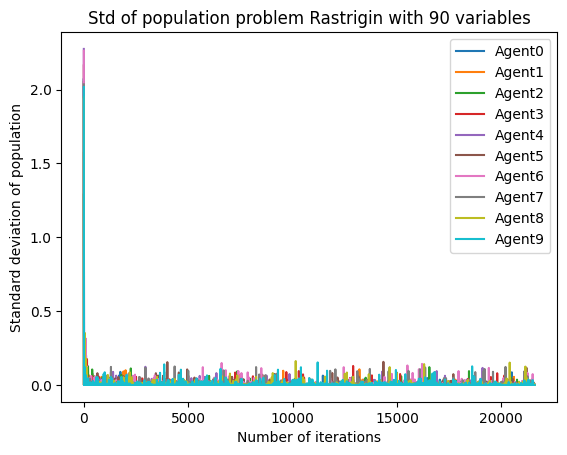

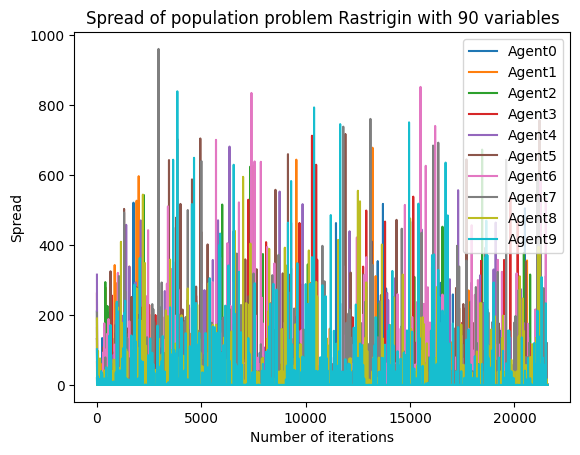

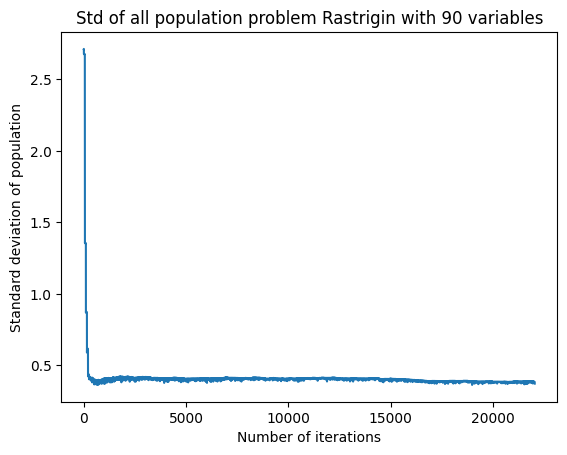

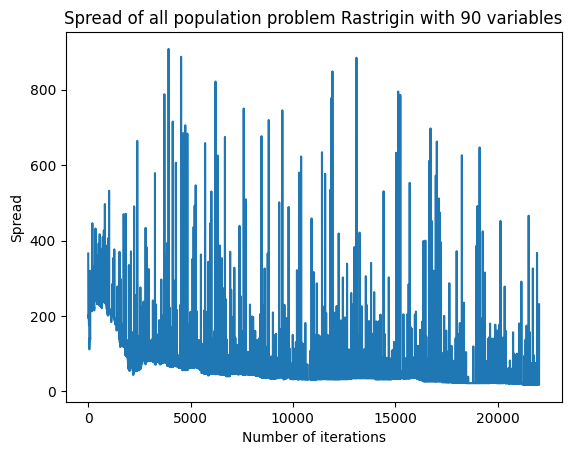

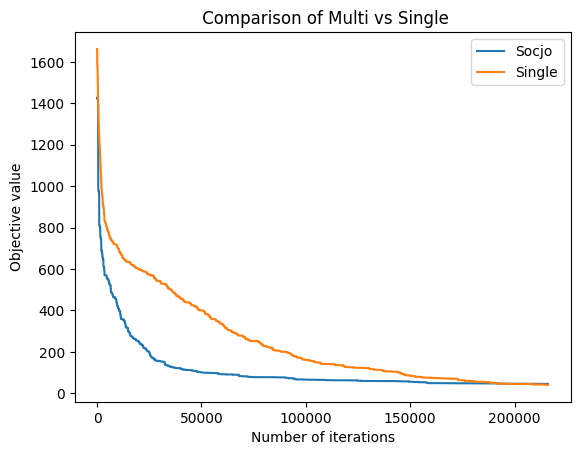

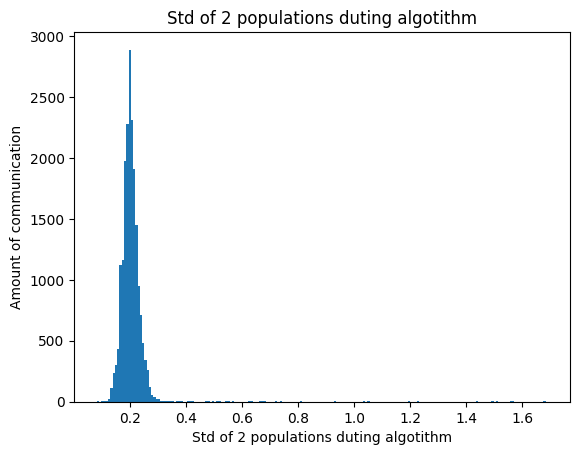

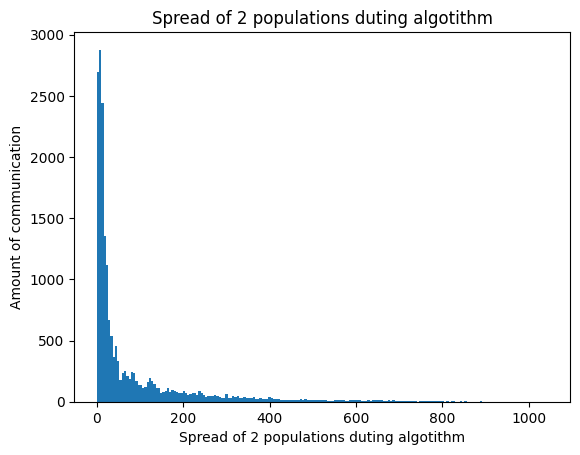

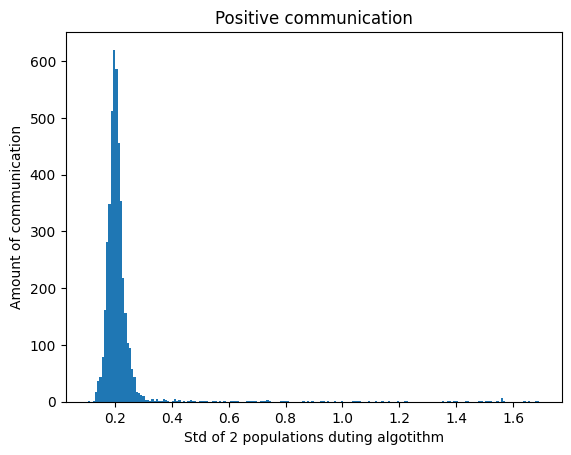

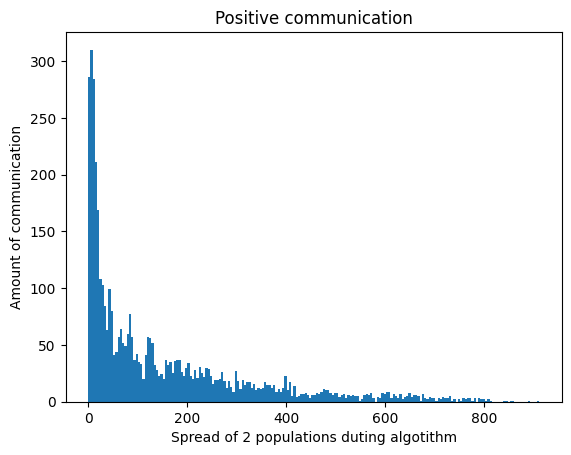

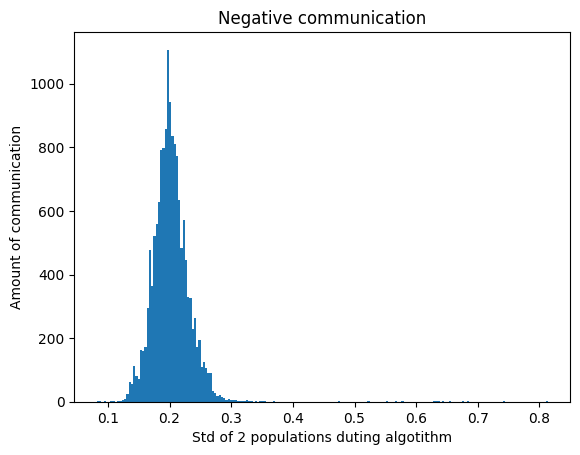

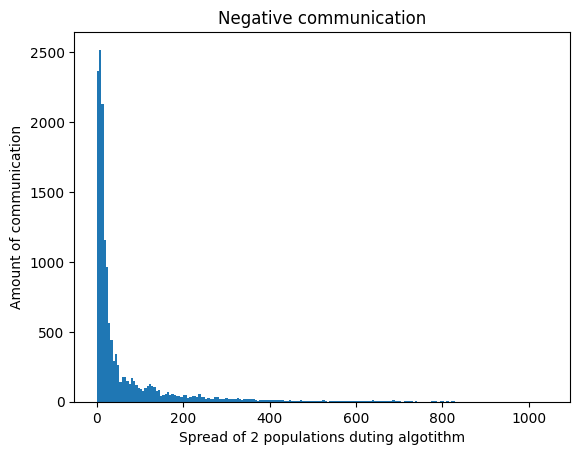

INFO:root:plotting finished in 0.07325461705525717
INFO:root:Run 0 out of 3
INFO:root:Socjo started
INFO:root:Socjo finished in 5.202817698319753
INFO:root:comparison finished in 4.654280706246694
INFO:root:best socjo 76.28735979757192 best single 24.267644839019482


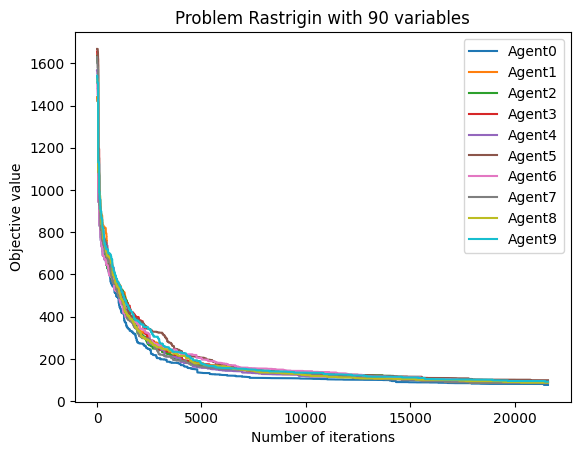

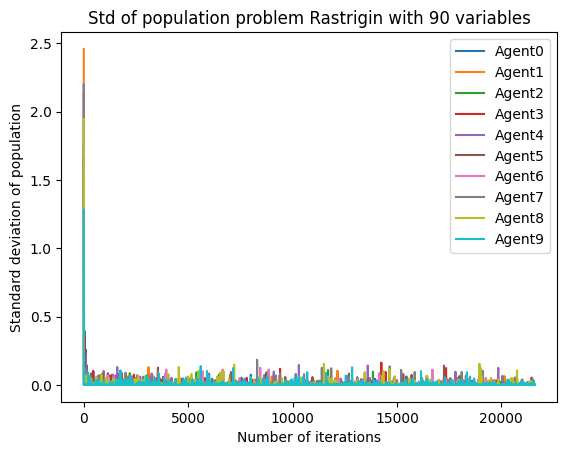

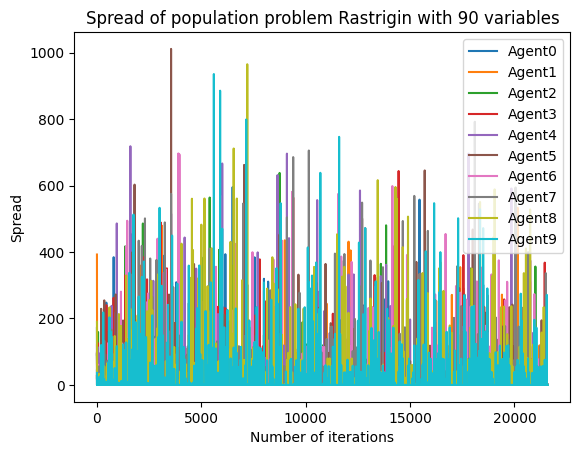

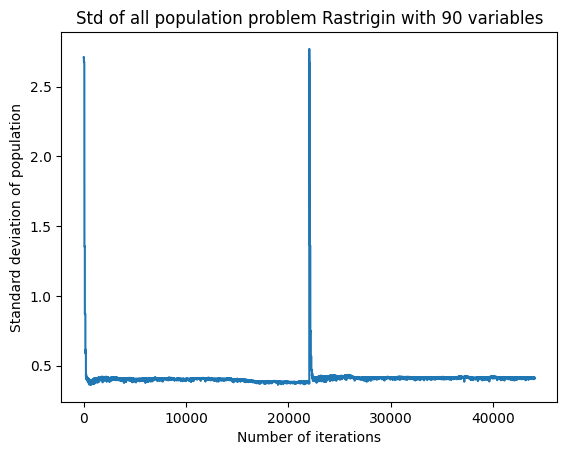

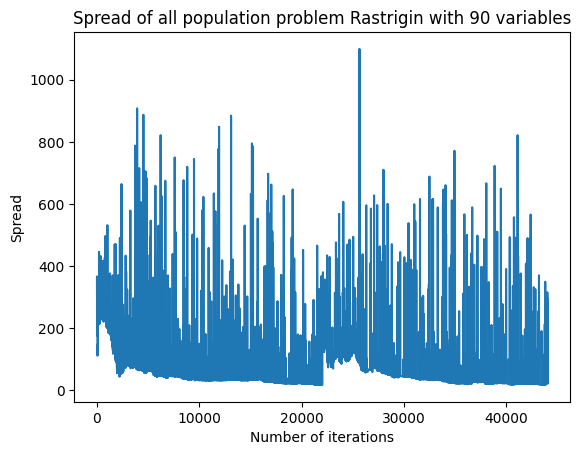

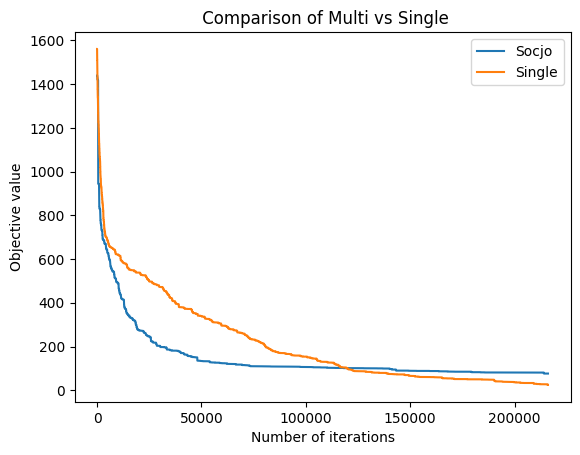

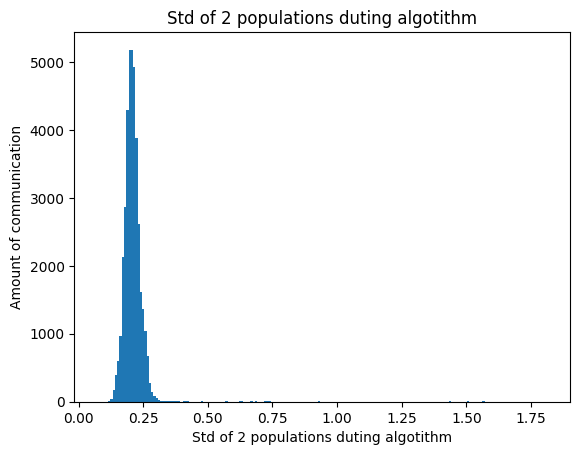

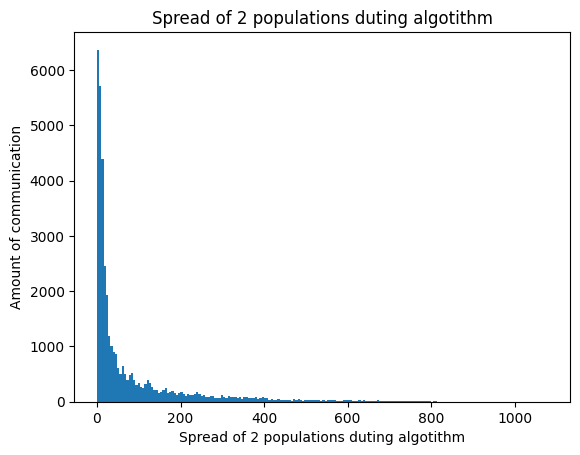

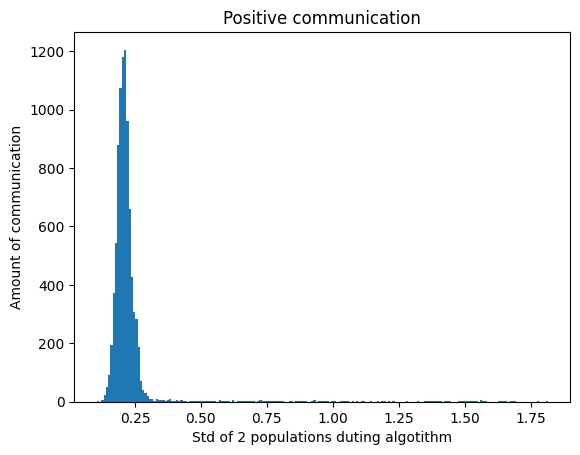

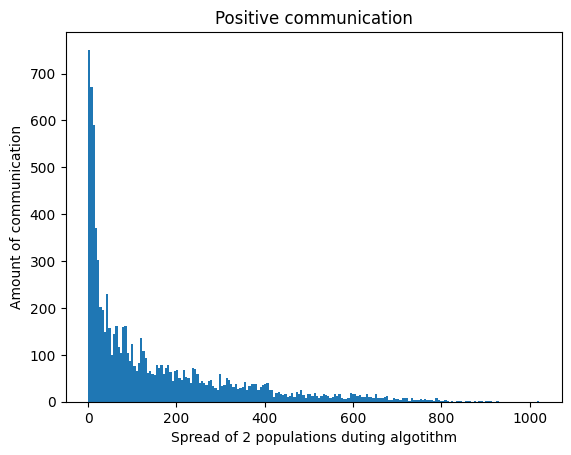

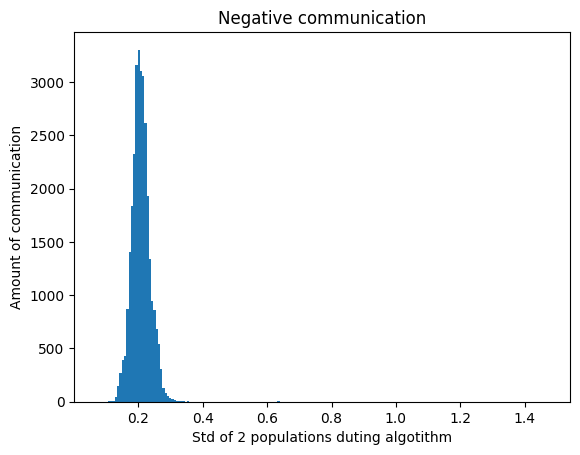

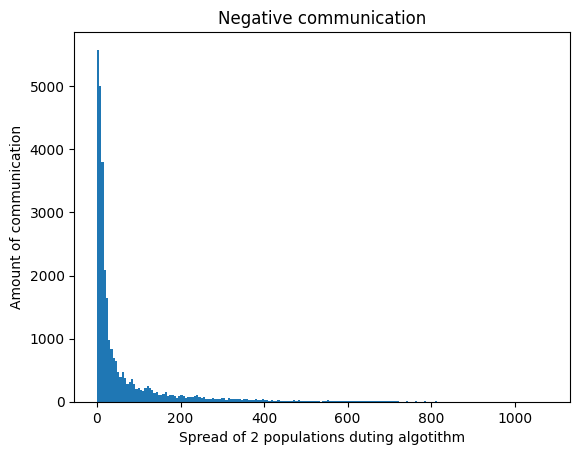

INFO:root:plotting finished in 0.07135987281799316
INFO:root:Run 1 out of 3
INFO:root:Socjo started
INFO:root:Socjo finished in 5.235487159093221
INFO:root:comparison finished in 4.657285046577454
INFO:root:best socjo 54.81585919699887 best single 23.446311070968992


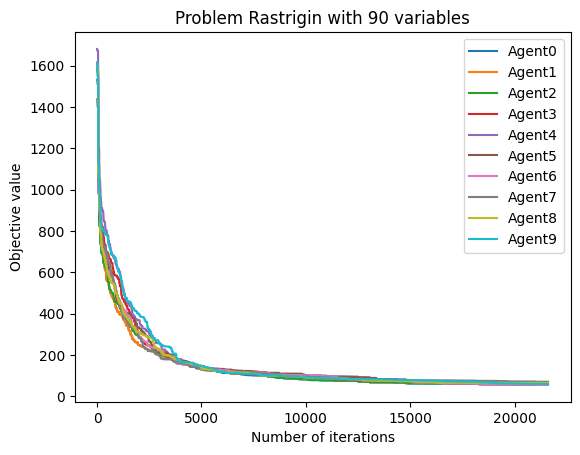

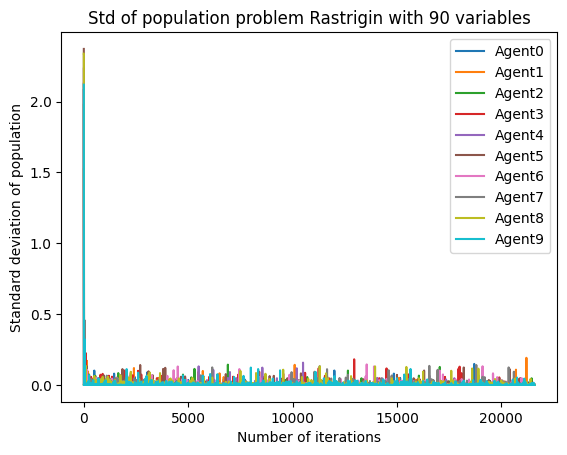

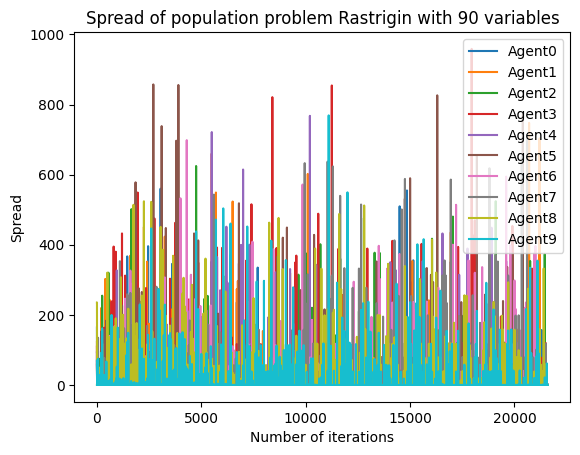

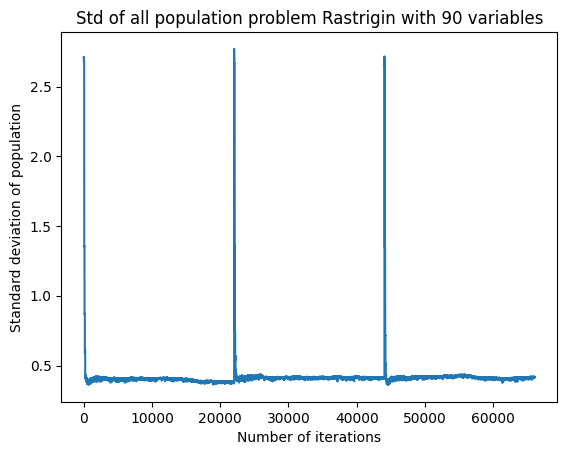

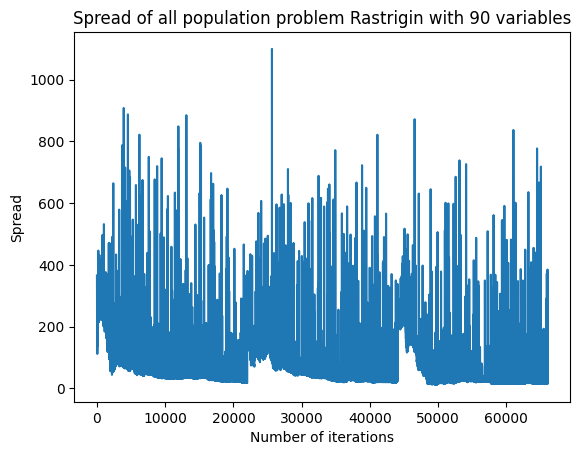

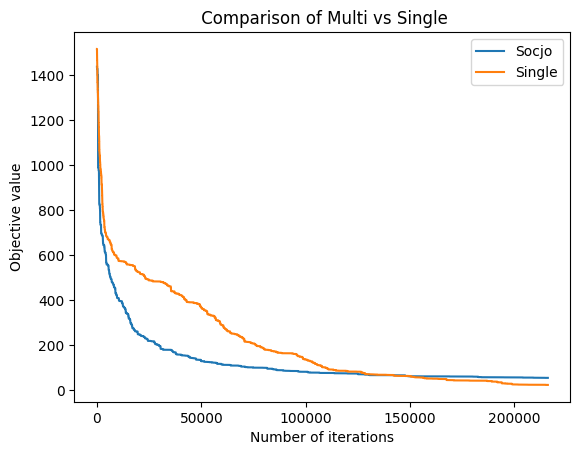

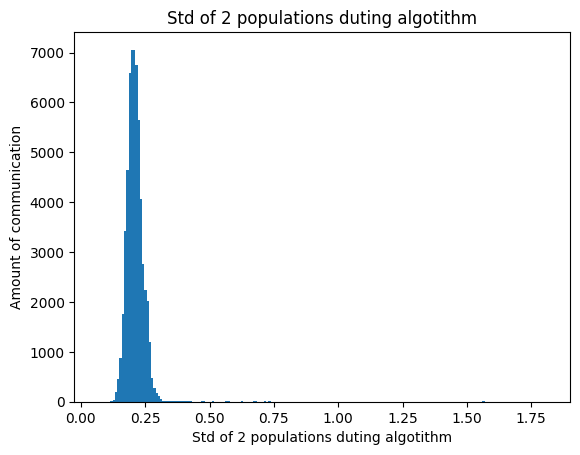

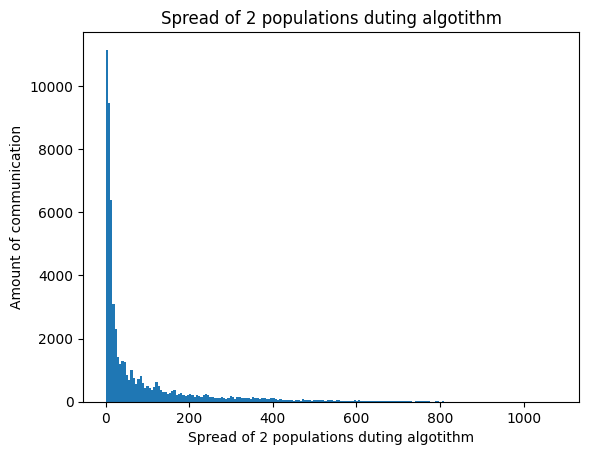

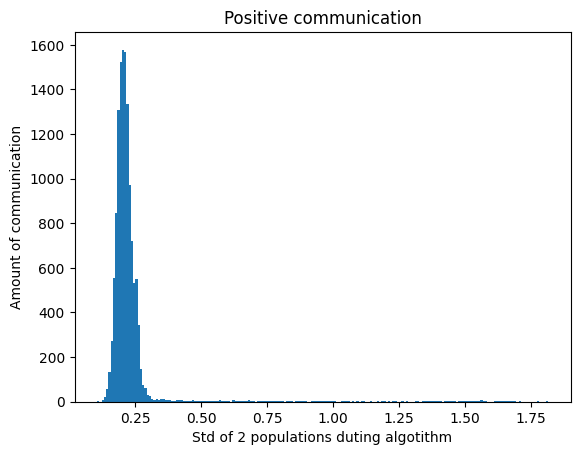

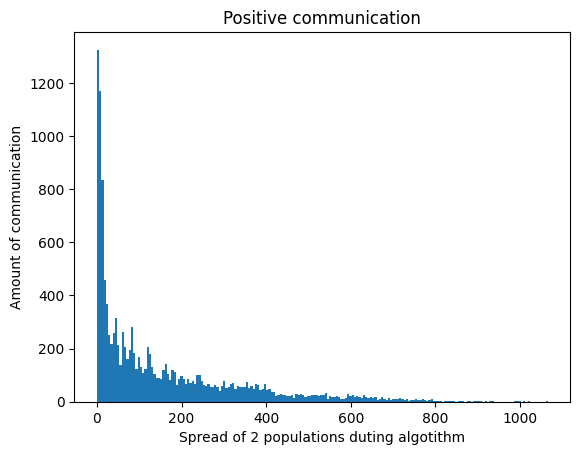

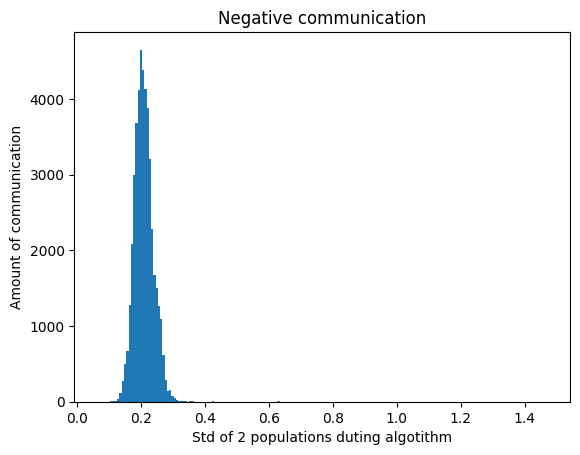

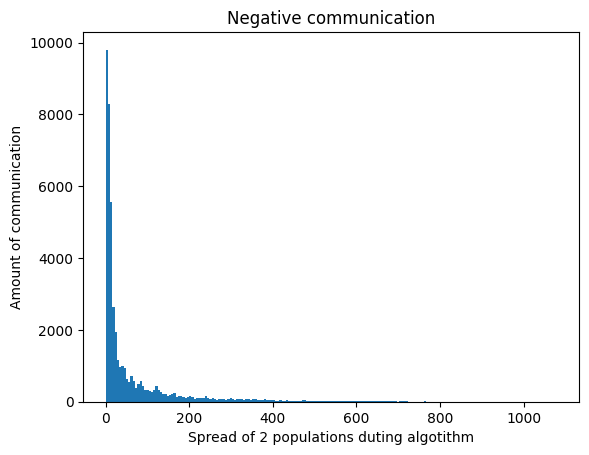

INFO:root:plotting finished in 0.07358959515889486
INFO:root:Run 2 out of 3


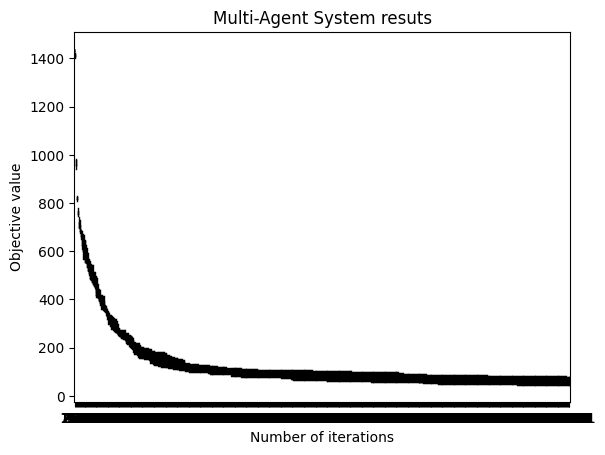

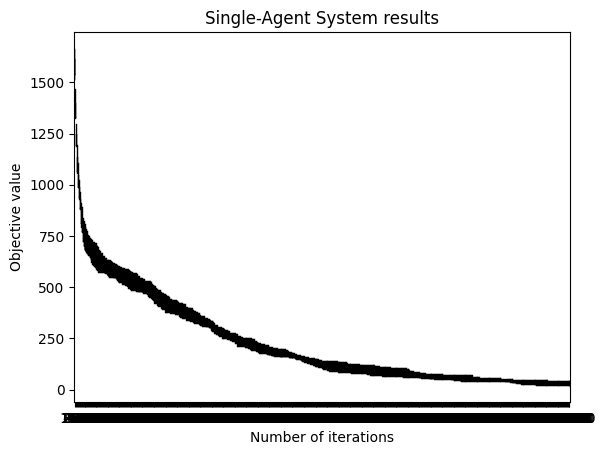

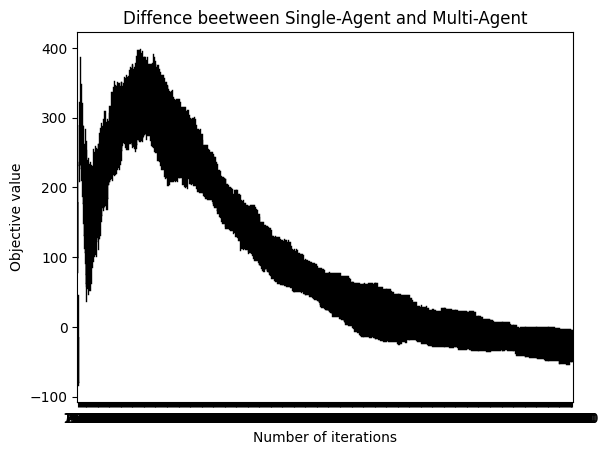

INFO:root:{'LOG_LEVEL': 'INFO', 'number_of_agents': 10, 'problem': 'Griewank', 'problem_size': 90, 'communication_type': 'temp2', 'communication_operator': 'average', 'max_time': 800, 'enable_plots': True, 'trust': 'global', 'population size': 5, 'offspring size': 15}
INFO:root:Socjo started
Progress: 162005it [02:48, 961.51it/s]                             
INFO:root:Socjo finished in 4.196668863296509
Progress: 162005it [00:15, 10601.12it/s]                            
INFO:root:comparison finished in 3.7827126224835714
INFO:root:best socjo 0.059900904746274186 best single 0.022119250070948837


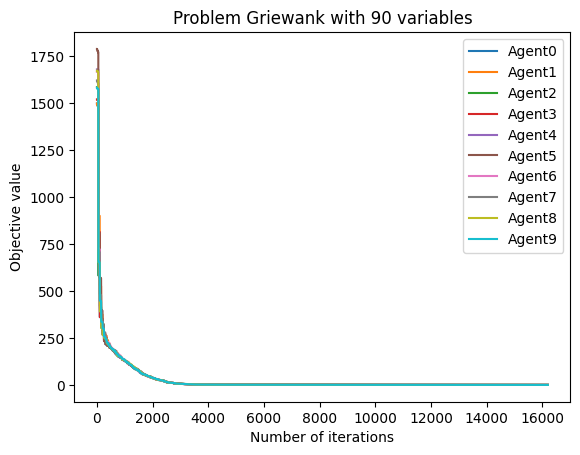

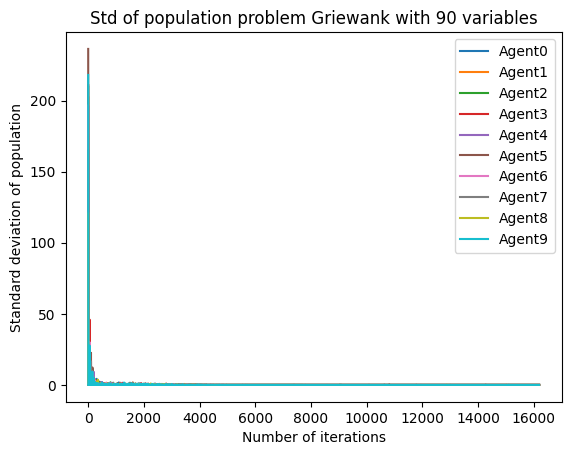

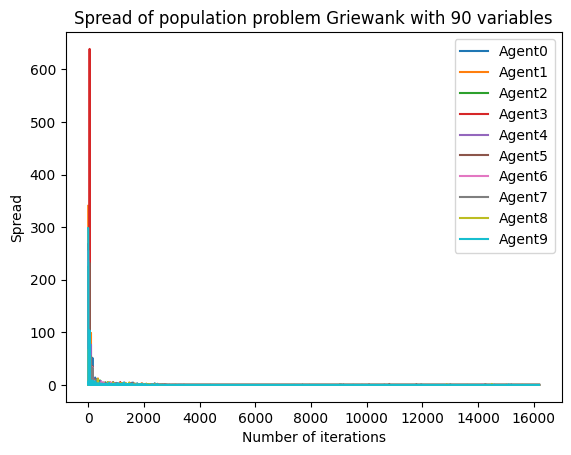

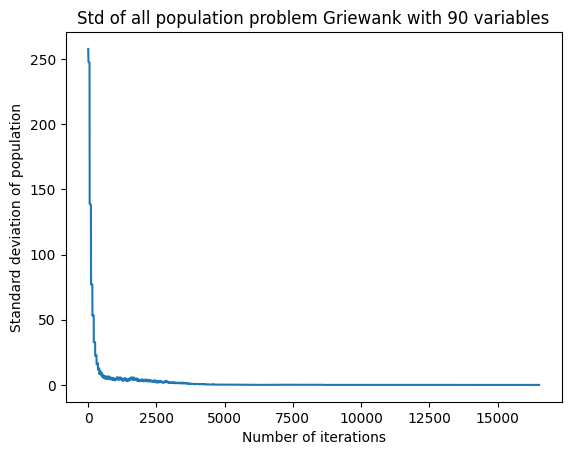

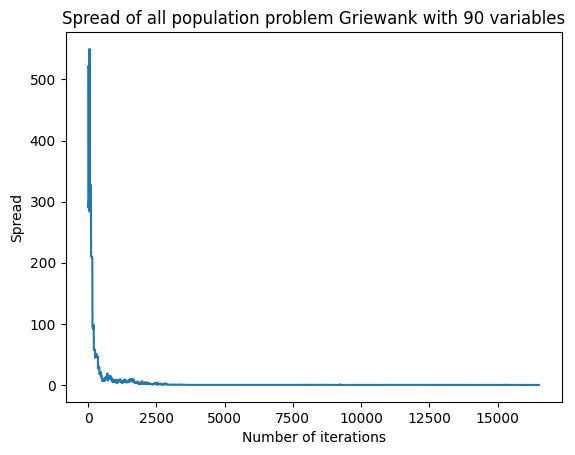

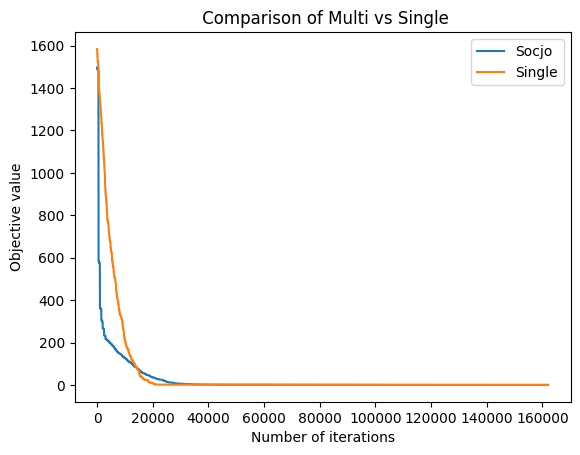

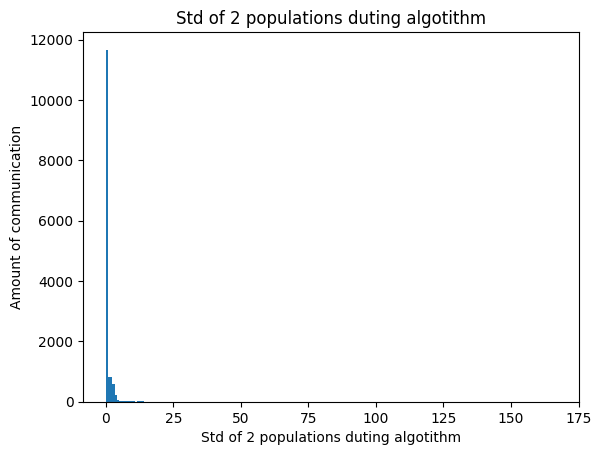

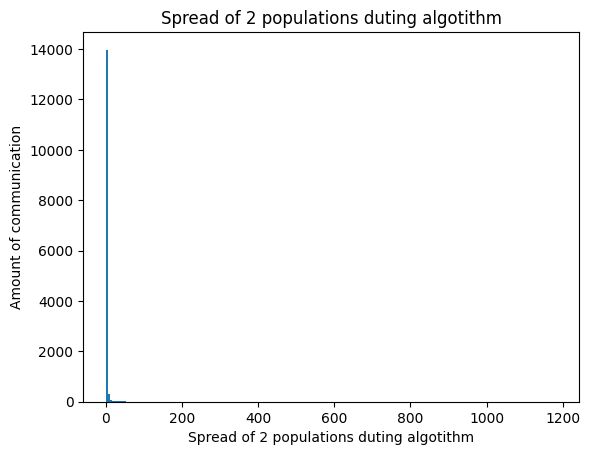

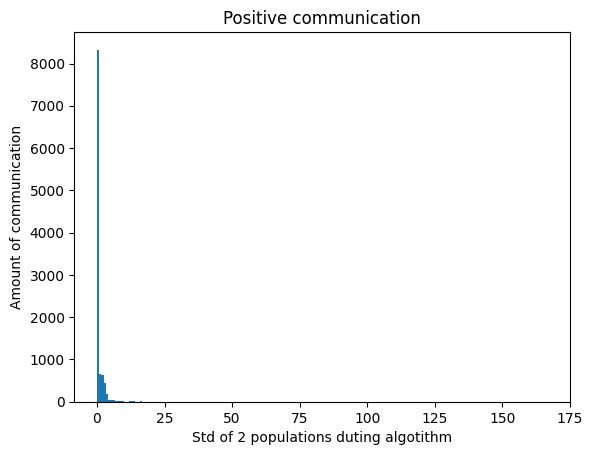

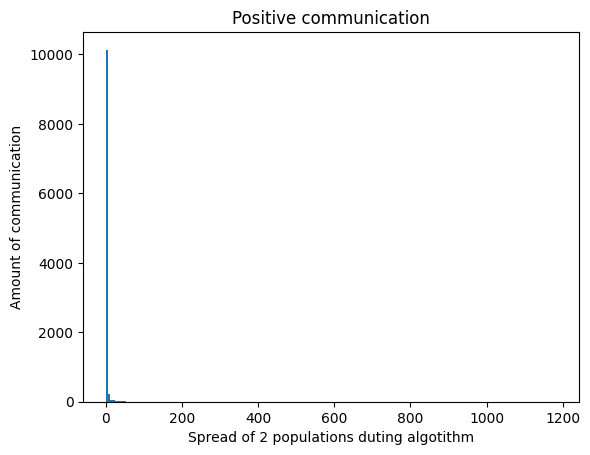

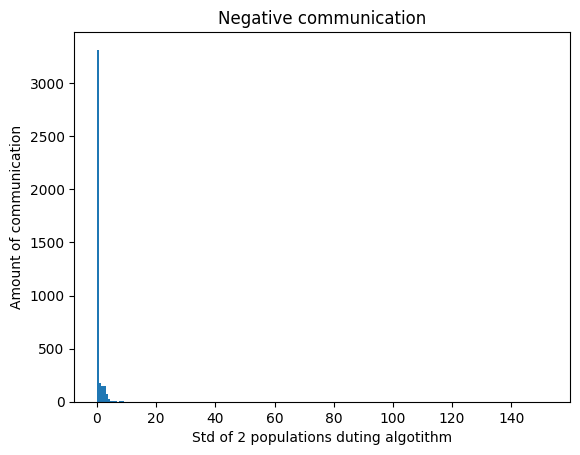

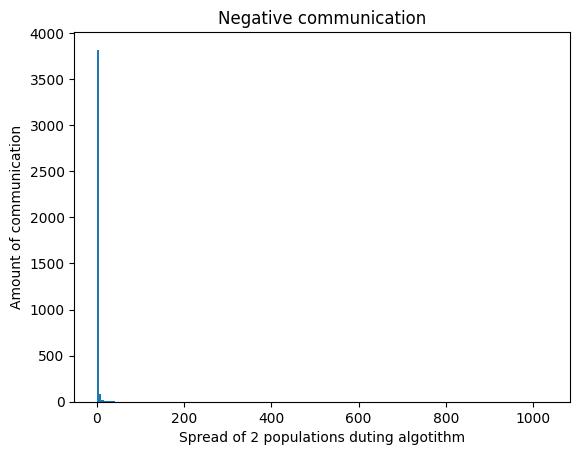

INFO:root:plotting finished in 0.05717170238494873
INFO:root:Run 0 out of 3
INFO:root:Socjo started
INFO:root:Socjo finished in 4.202734835942587
INFO:root:comparison finished in 3.7782419602076214
INFO:root:best socjo 0.03355290568343283 best single 0.0662014378752851


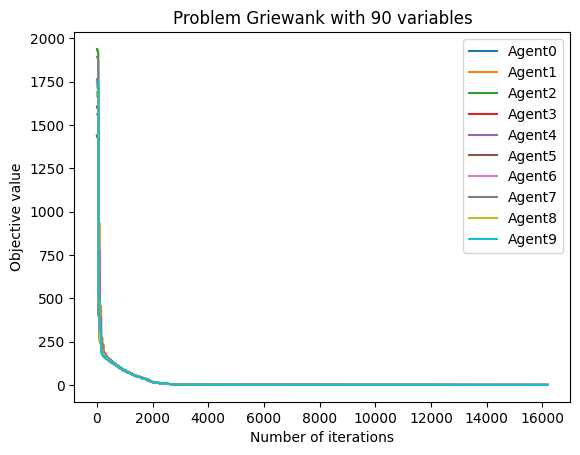

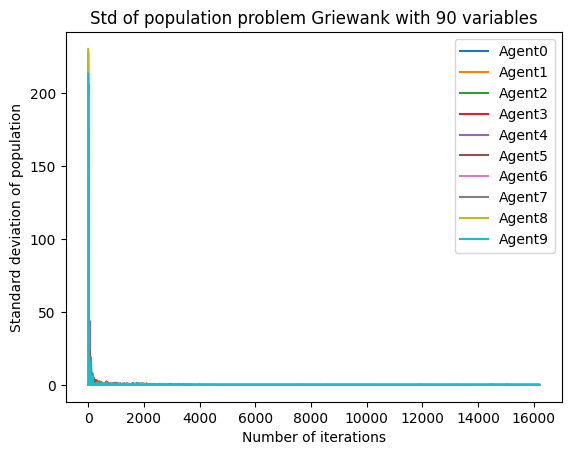

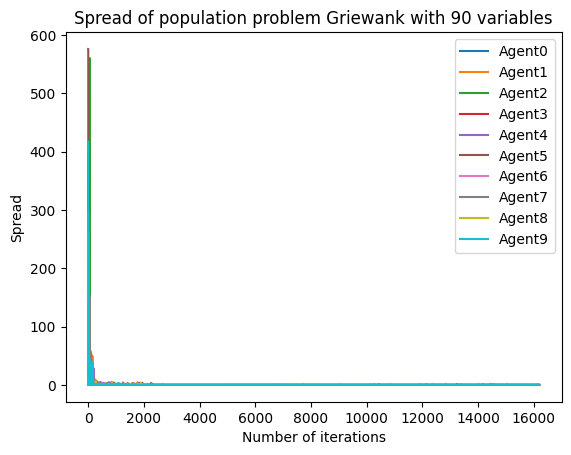

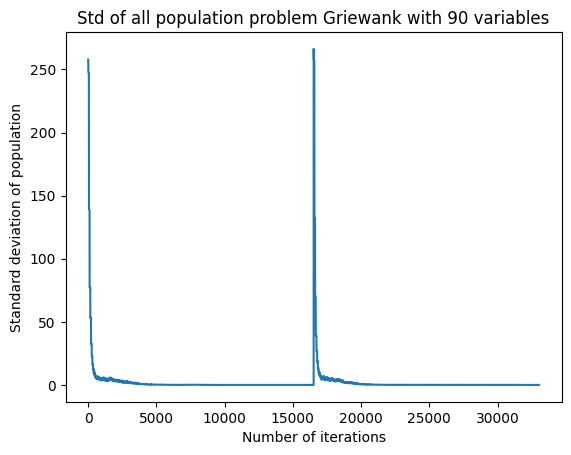

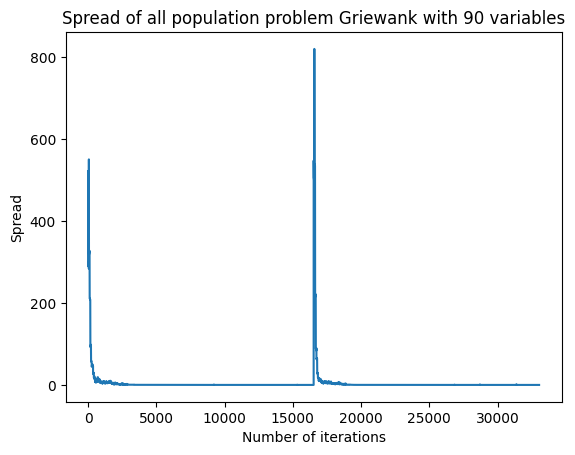

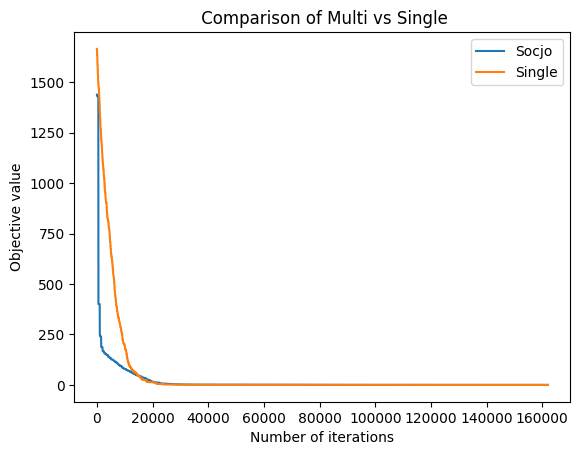

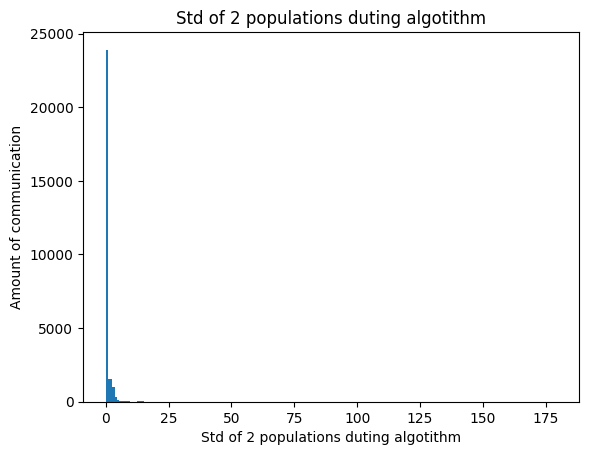

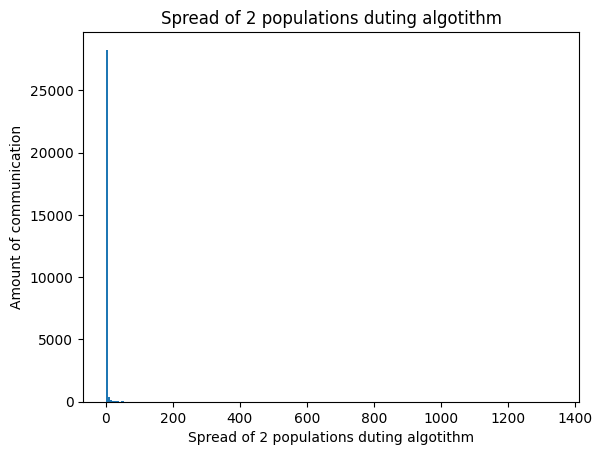

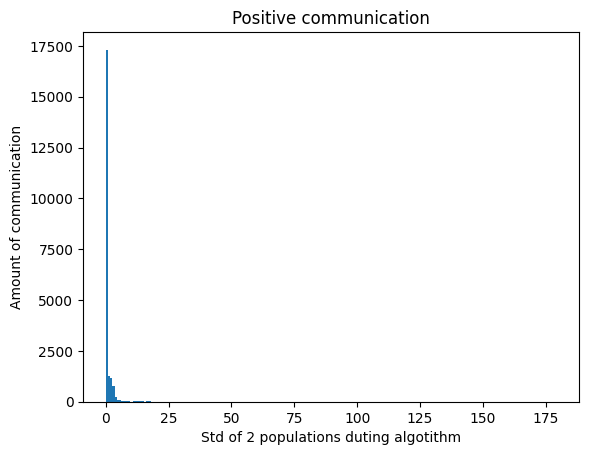

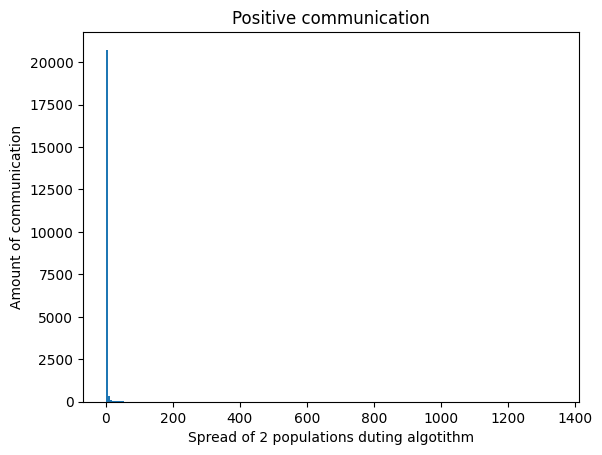

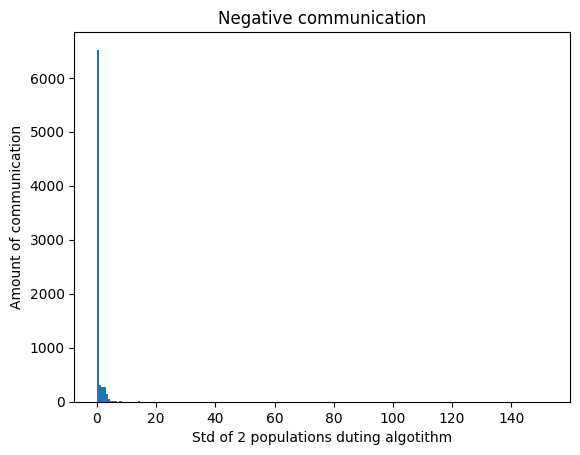

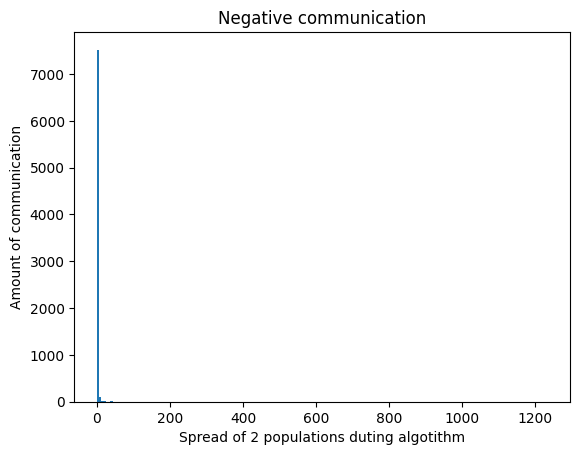

INFO:root:plotting finished in 0.057679247856140134
INFO:root:Run 1 out of 3
INFO:root:Socjo started
INFO:root:Socjo finished in 4.21023991505305
INFO:root:comparison finished in 3.761170808474223
INFO:root:best socjo 0.05117561207581567 best single 0.15313754271681967


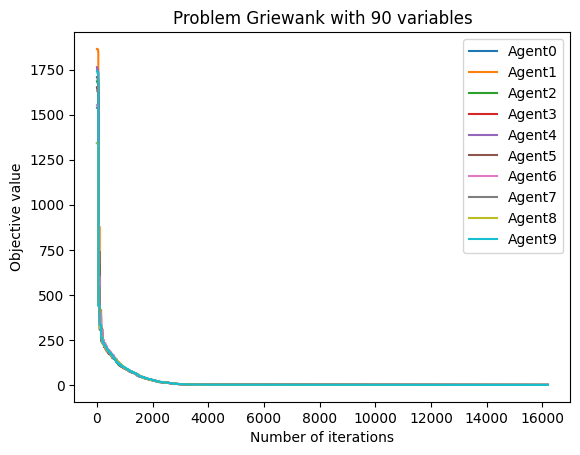

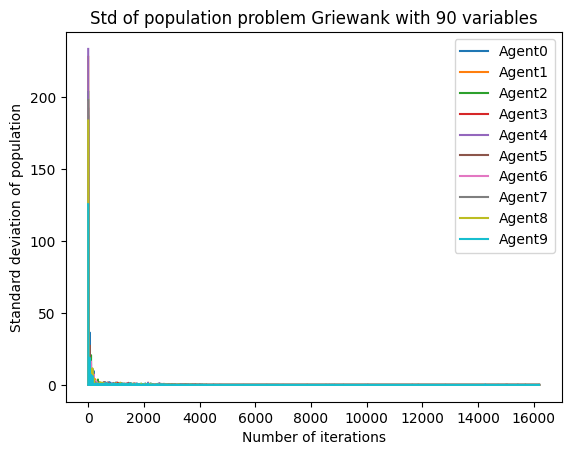

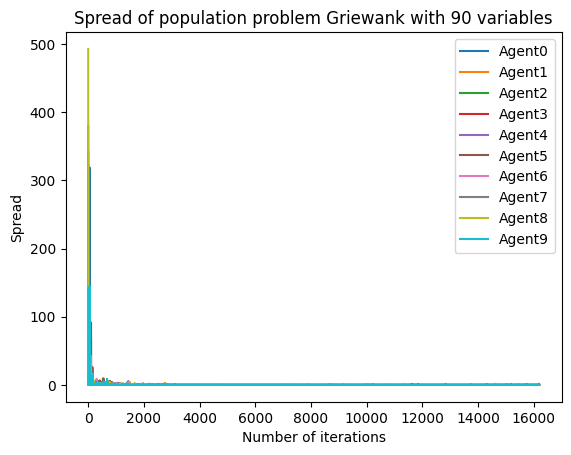

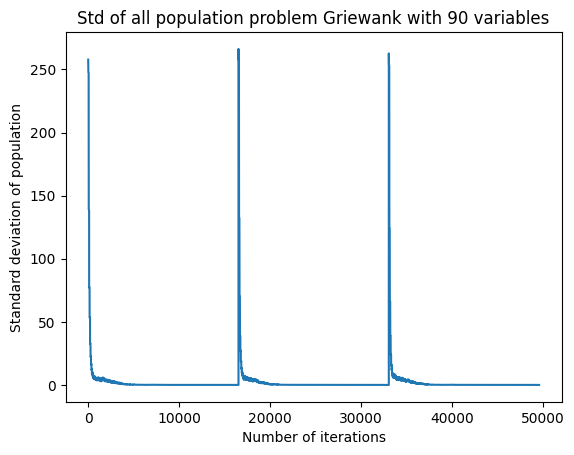

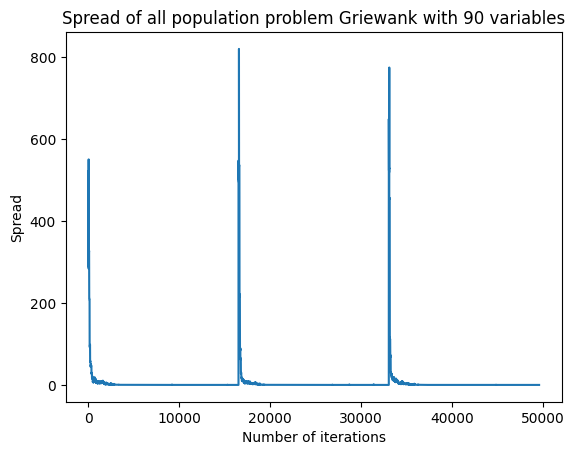

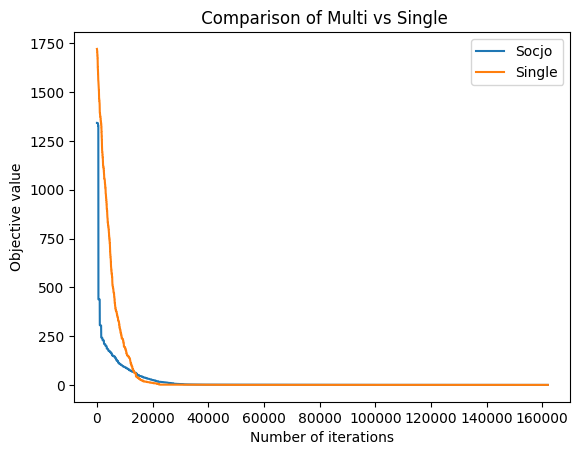

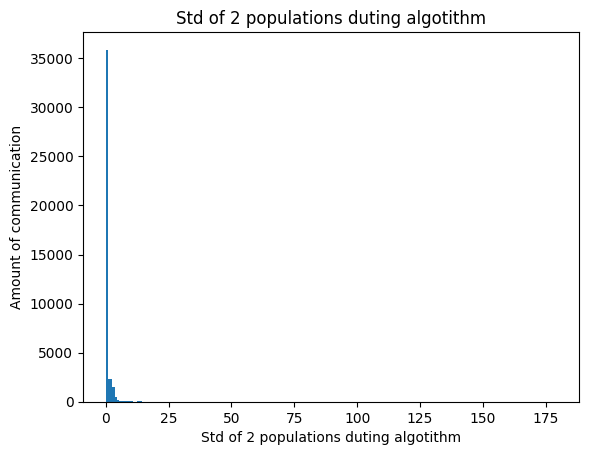

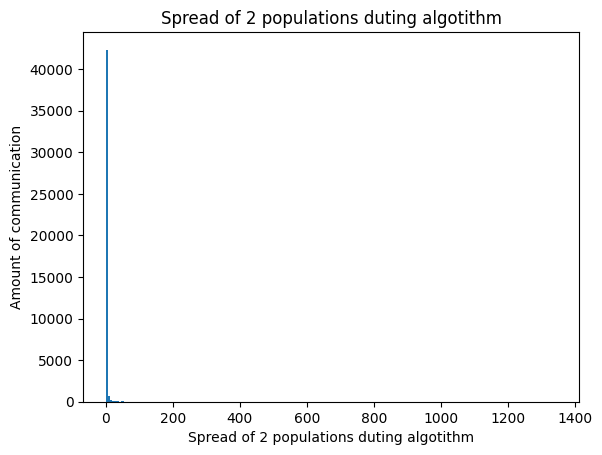

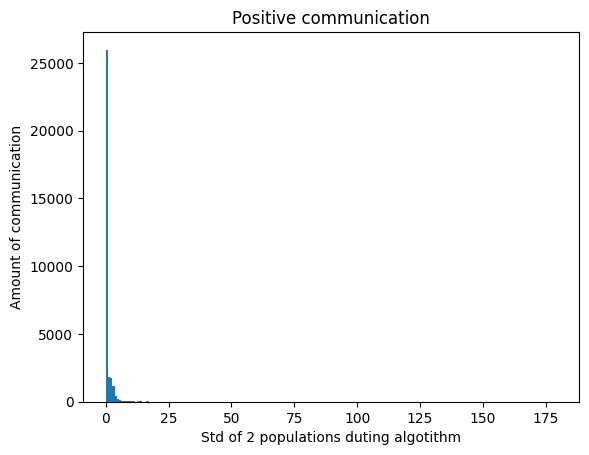

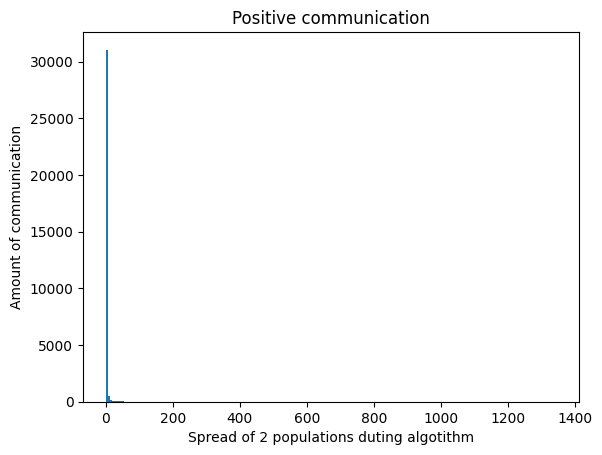

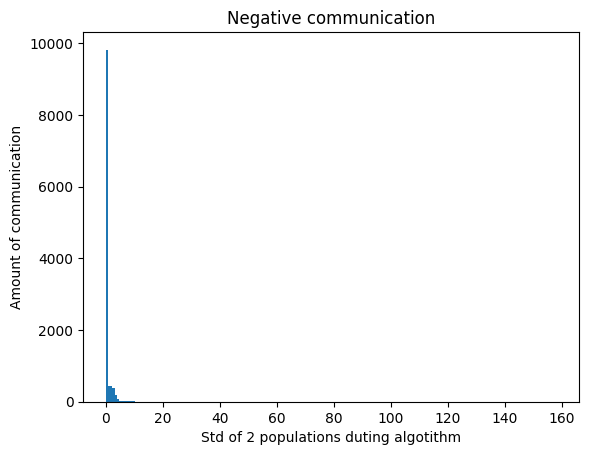

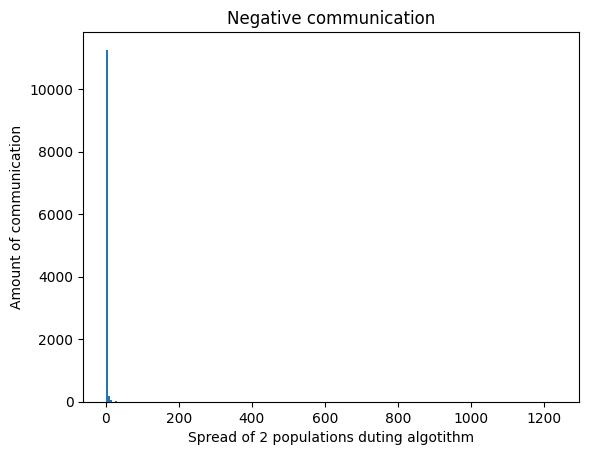

INFO:root:plotting finished in 0.06809037923812866
INFO:root:Run 2 out of 3


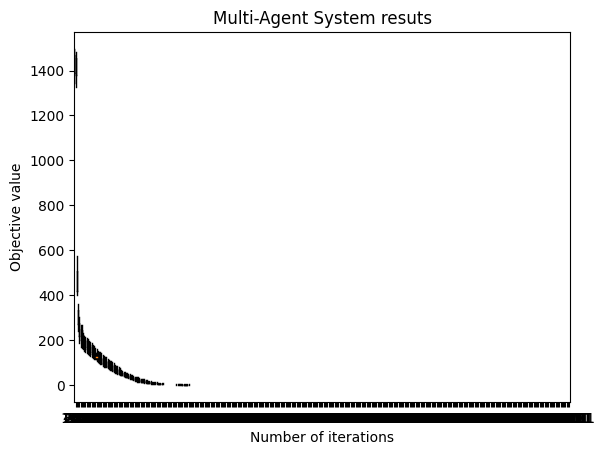

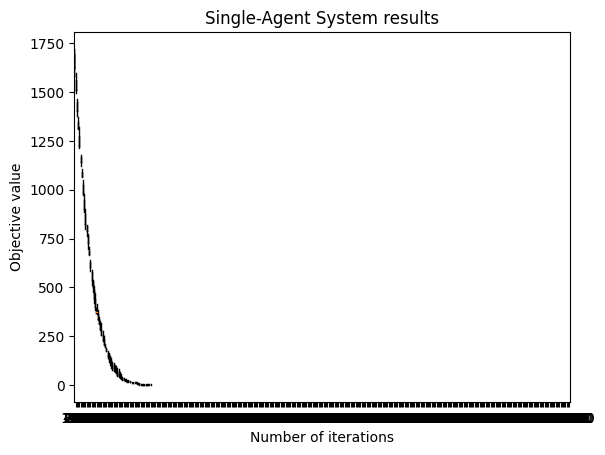

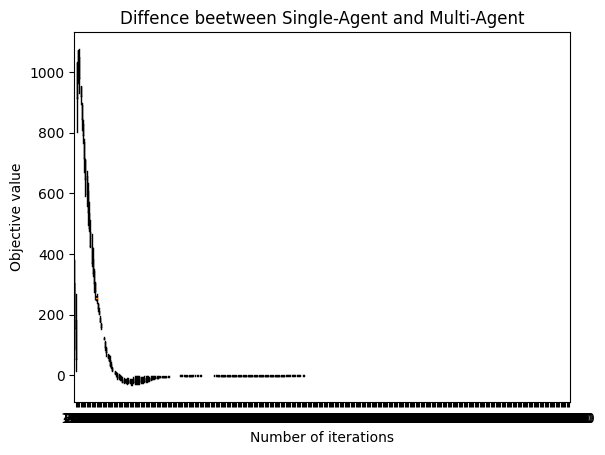

INFO:root:{'LOG_LEVEL': 'INFO', 'number_of_agents': 10, 'problem': 'Ackley', 'problem_size': 90, 'communication_type': 'temp2', 'communication_operator': 'average', 'max_time': 800, 'enable_plots': True, 'trust': 'global', 'population size': 5, 'offspring size': 15}
INFO:root:Socjo started
Progress: 108005it [01:39, 1088.97it/s]                            
INFO:root:Socjo finished in 2.461970063050588
Progress: 108005it [00:08, 12288.01it/s]                            
INFO:root:comparison finished in 2.2063724478085835
INFO:root:best socjo 0.26671472866305423 best single 0.15494880428655877


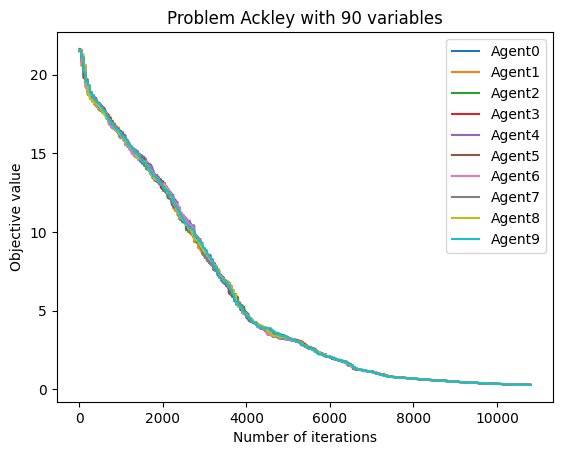

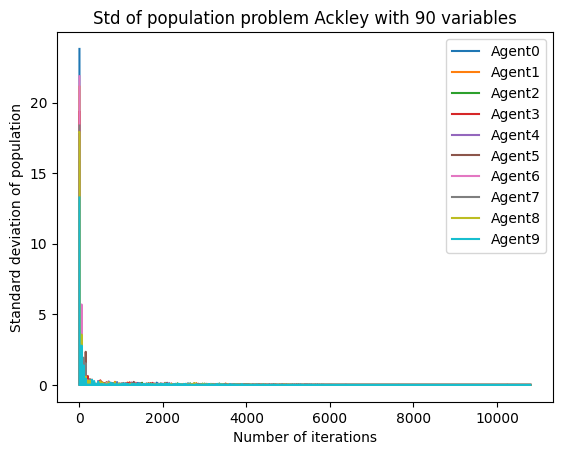

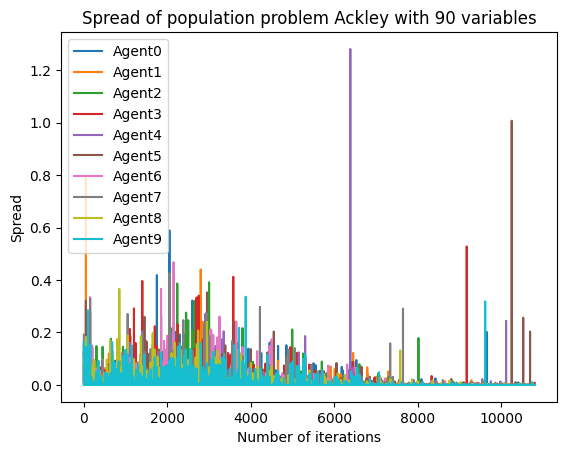

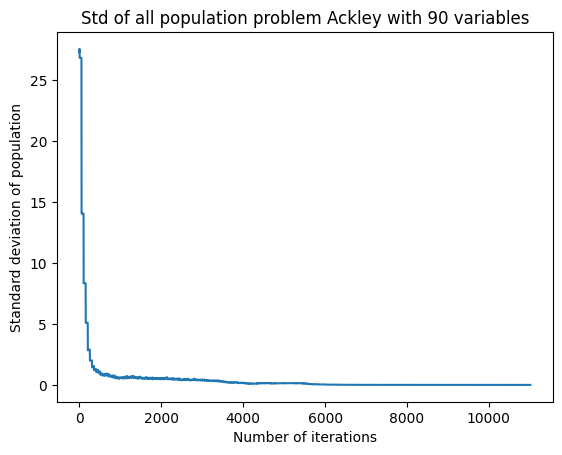

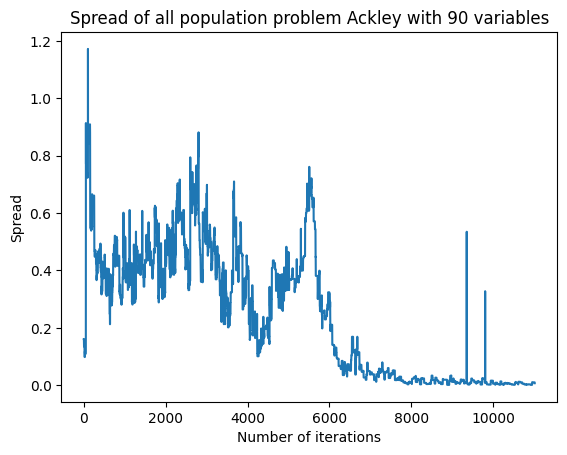

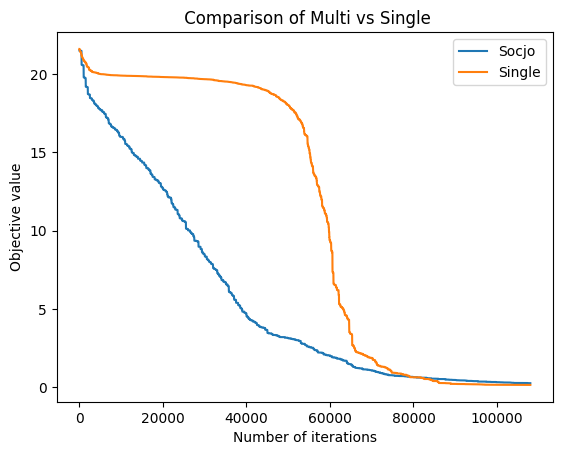

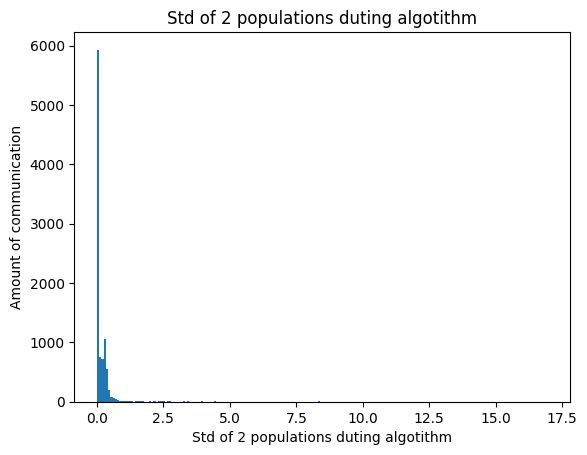

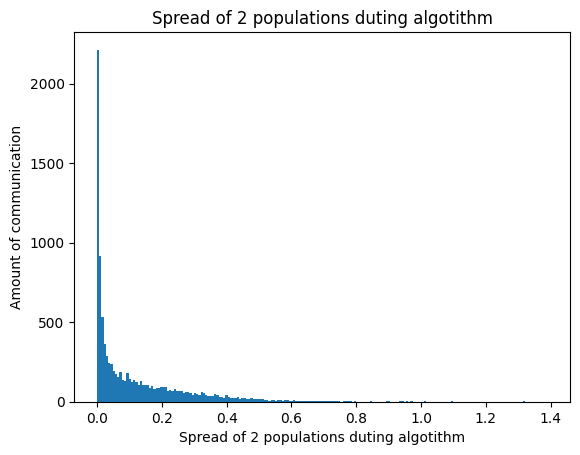

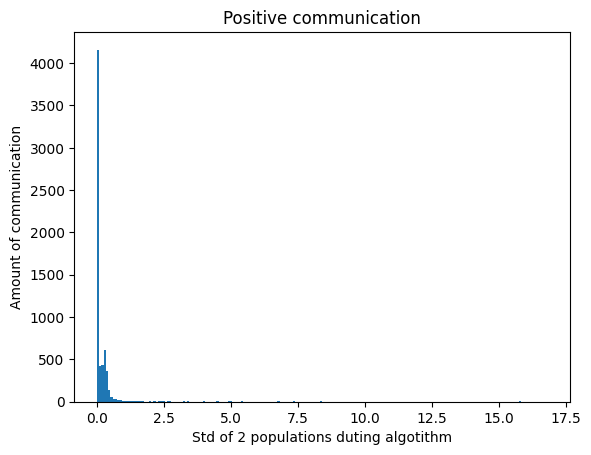

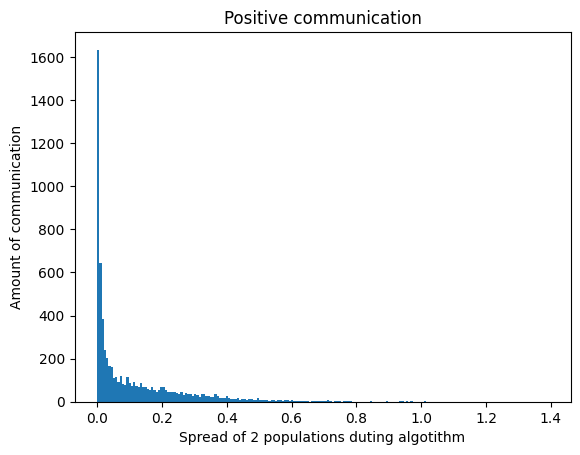

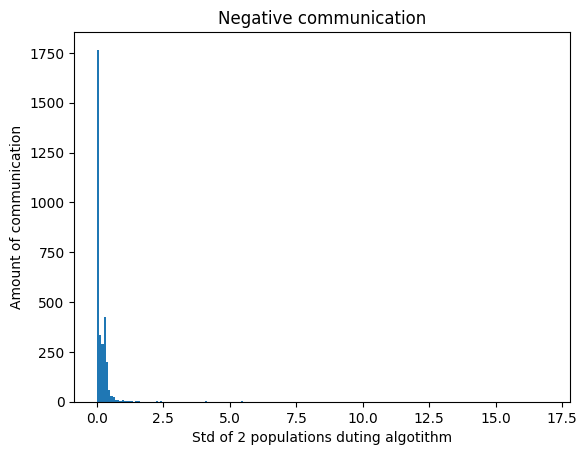

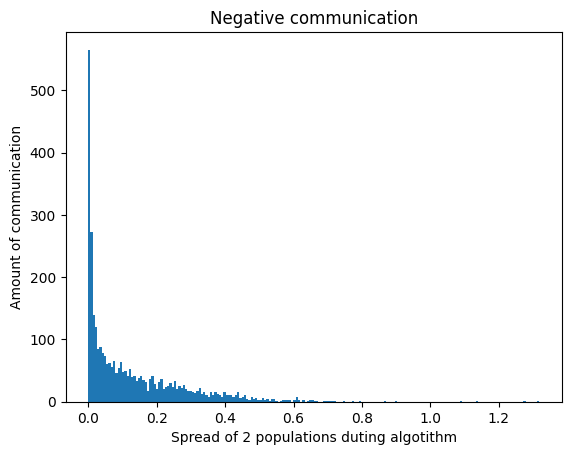

INFO:root:plotting finished in 0.059912951787312825
INFO:root:Run 0 out of 3
INFO:root:Socjo started
INFO:root:Socjo finished in 2.4639458696047467
INFO:root:comparison finished in 2.2048099358876545
INFO:root:best socjo 0.3493200780578367 best single 0.40360286744065776


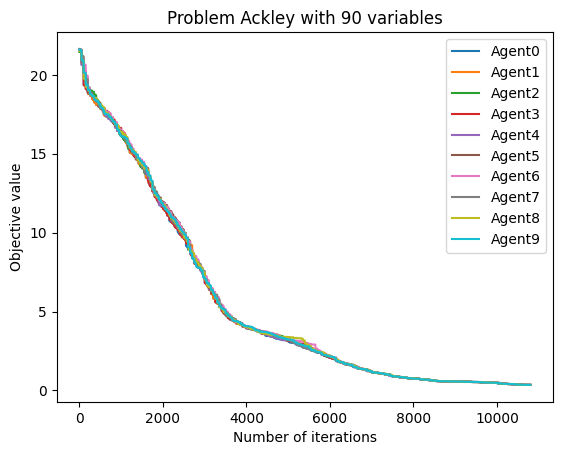

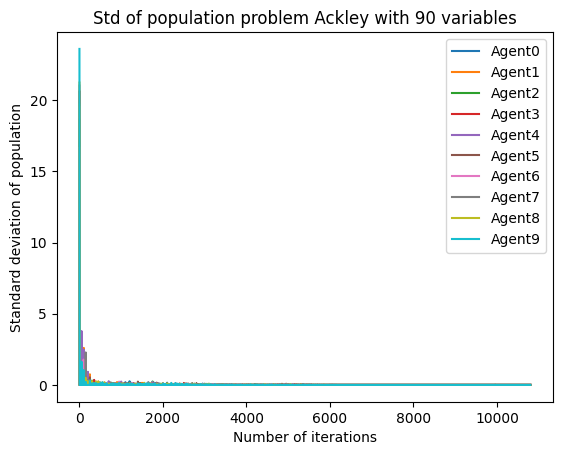

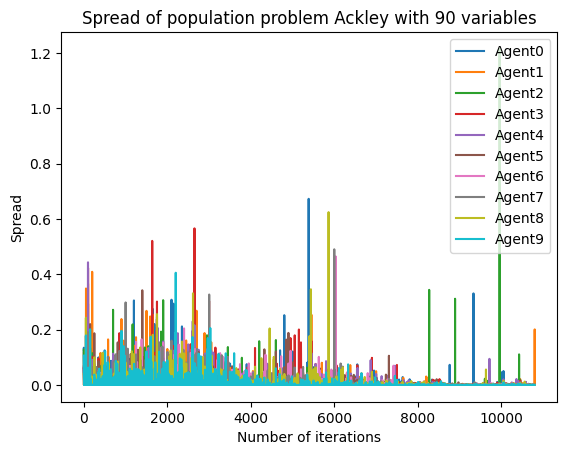

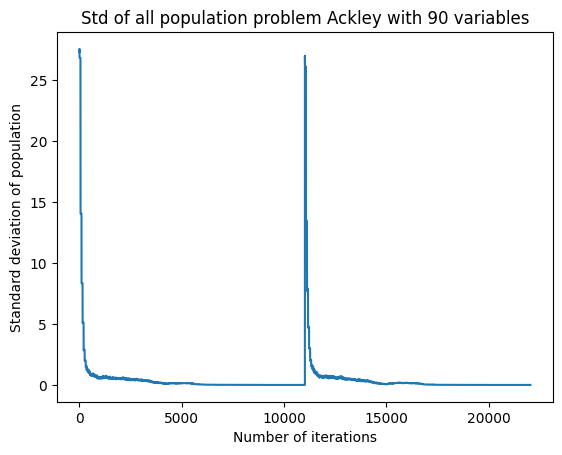

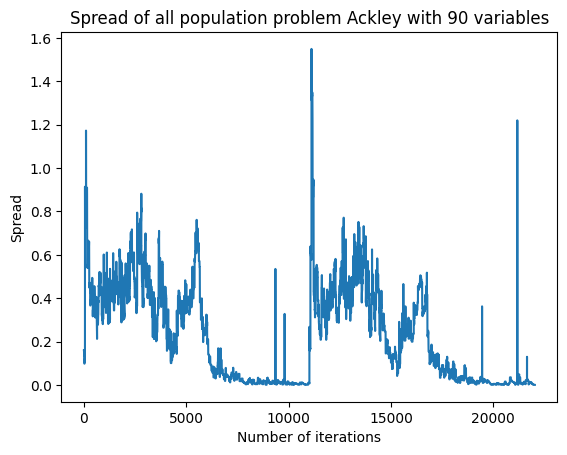

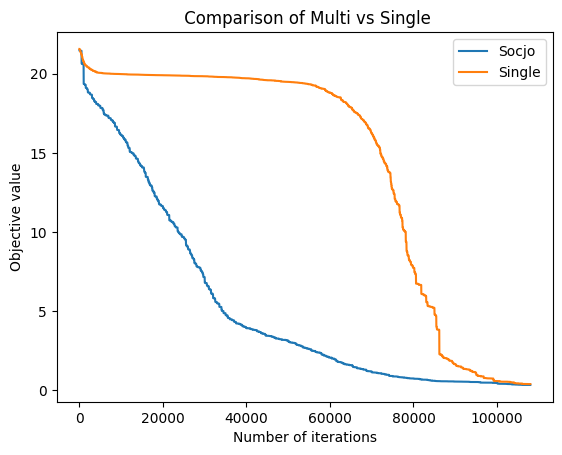

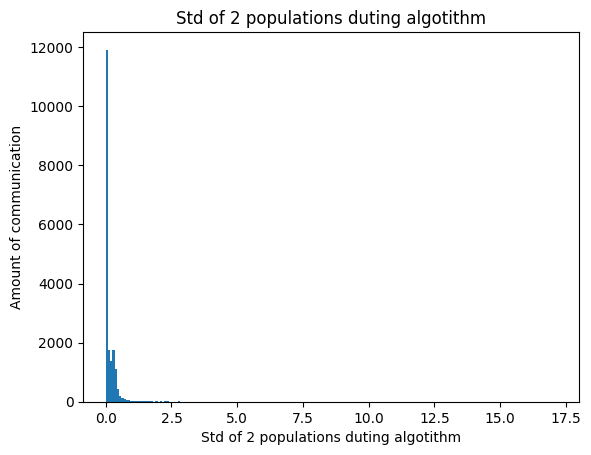

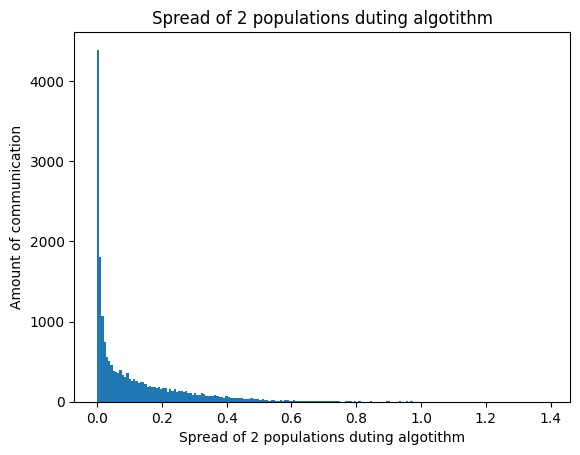

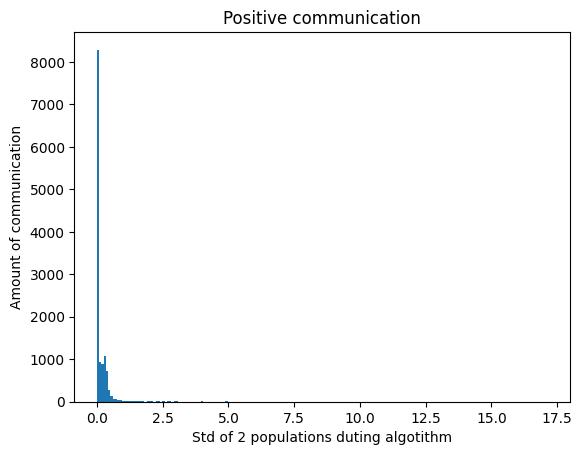

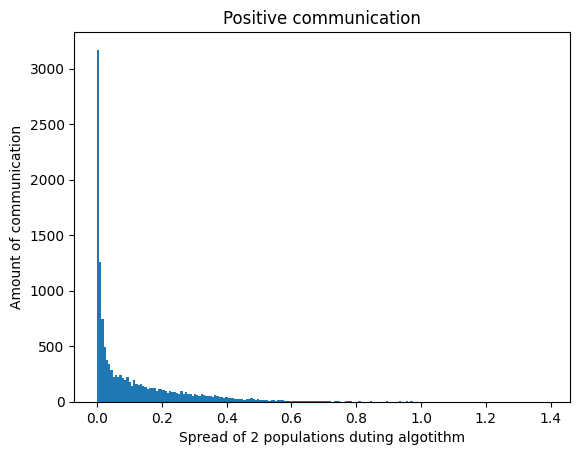

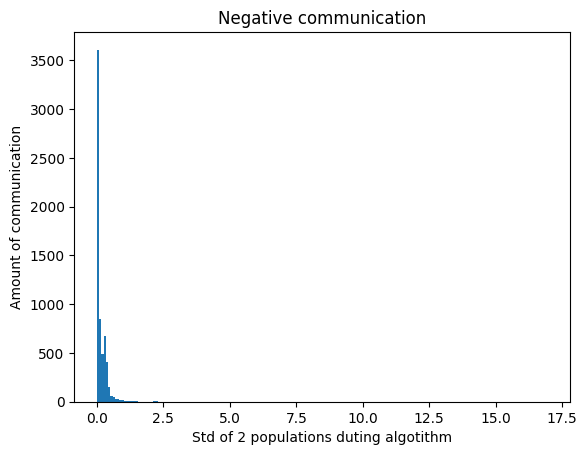

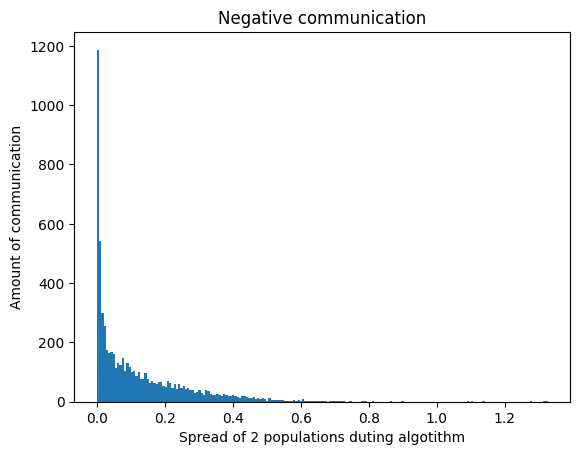

INFO:root:plotting finished in 0.061260342597961426
INFO:root:Run 1 out of 3
INFO:root:Socjo started
INFO:root:Socjo finished in 2.464854347705841
INFO:root:comparison finished in 2.1782971660296124
INFO:root:best socjo 0.24724604373308212 best single 0.15697748826109192


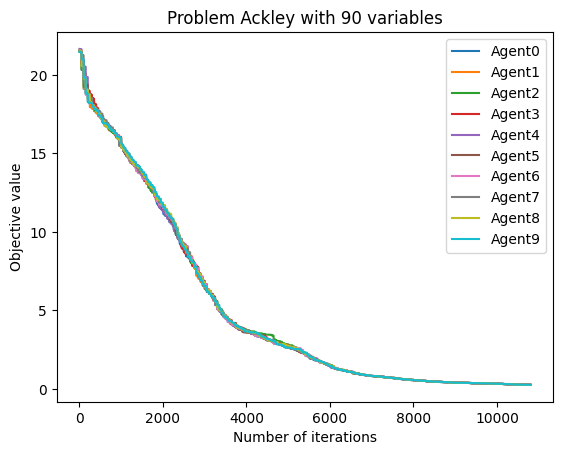

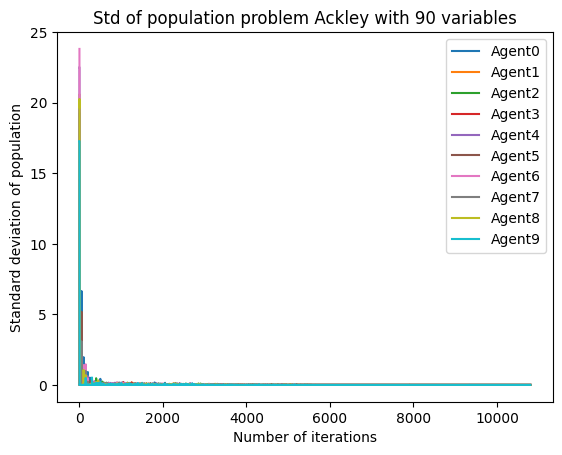

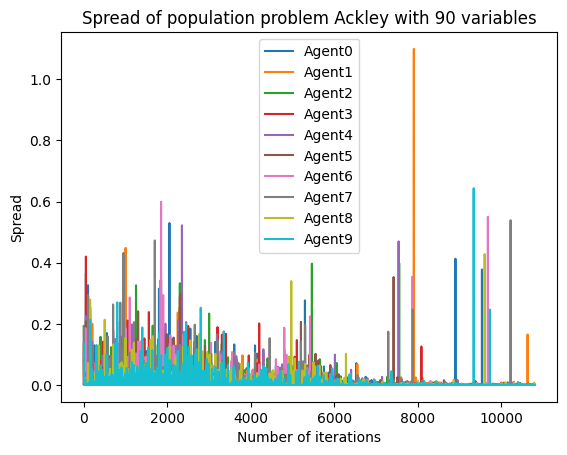

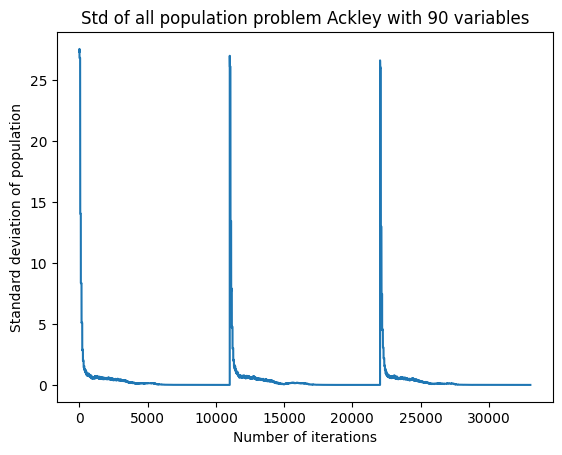

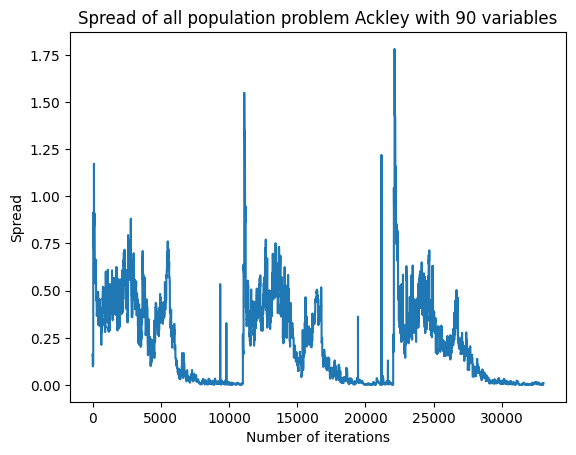

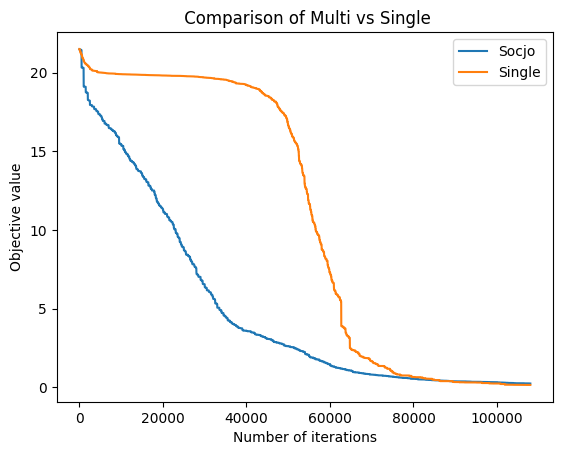

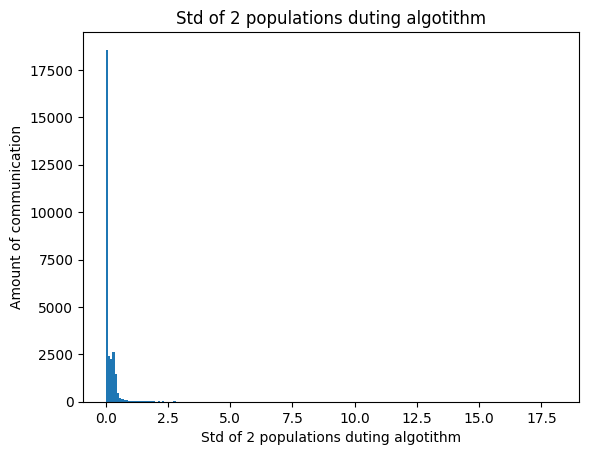

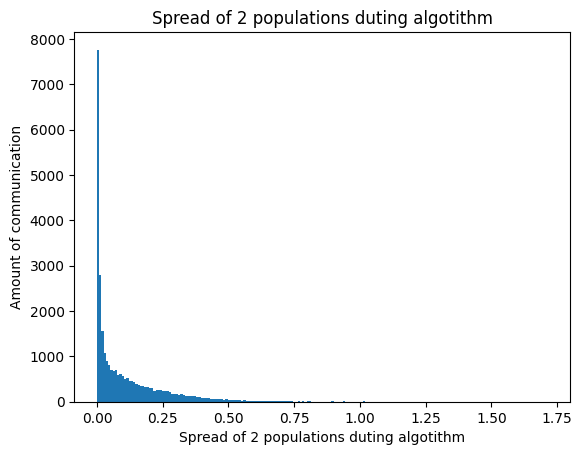

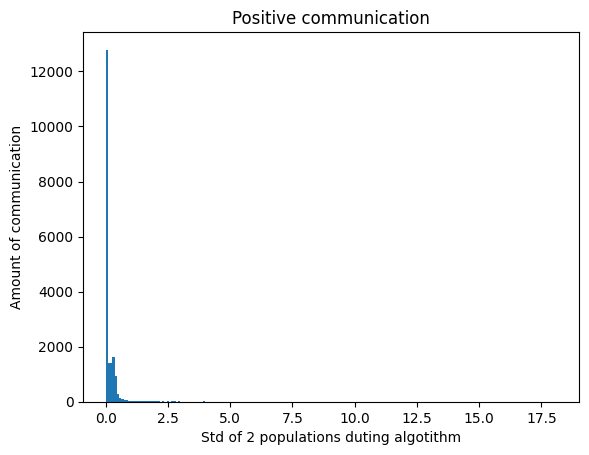

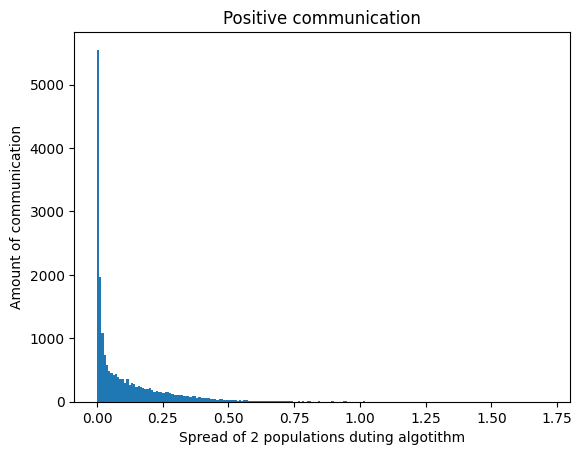

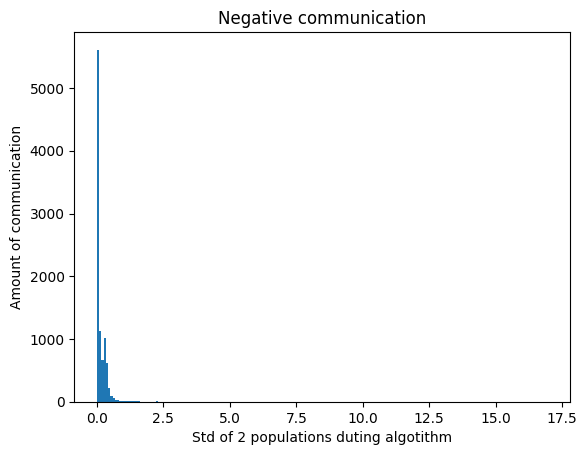

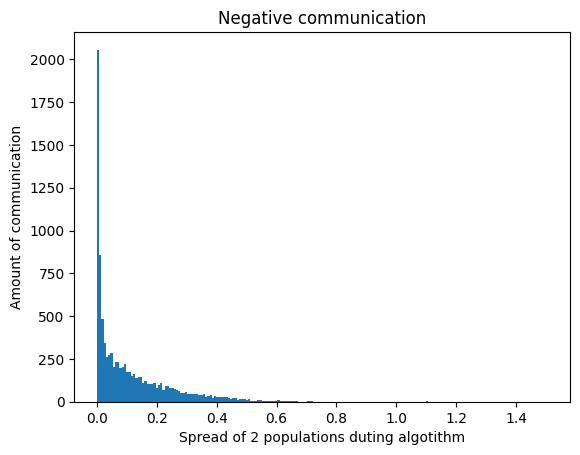

INFO:root:plotting finished in 0.05939419269561767
INFO:root:Run 2 out of 3


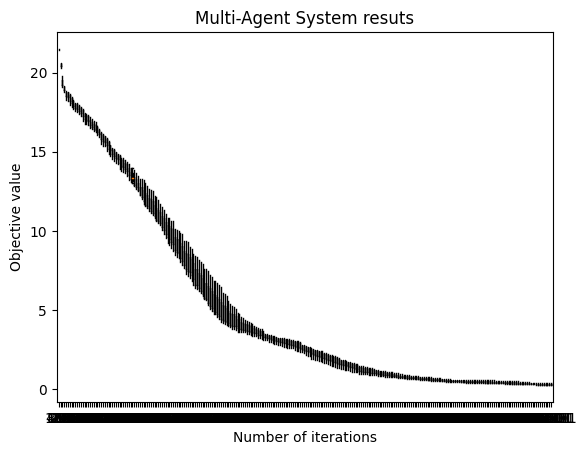

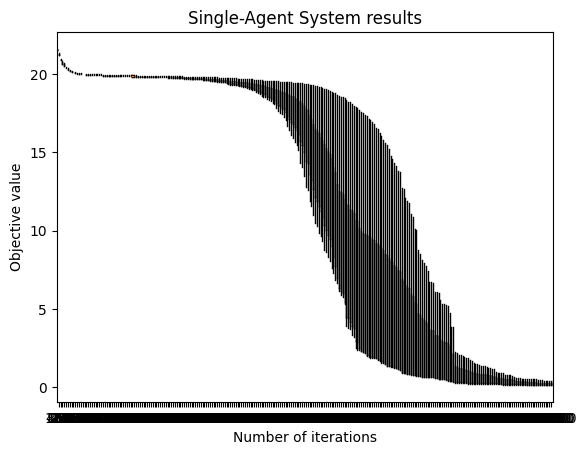

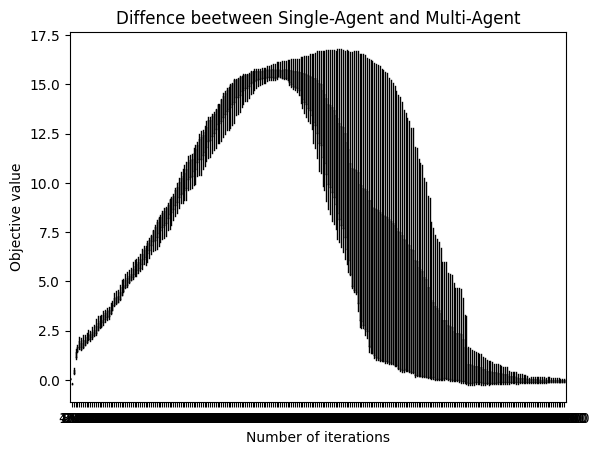

In [1]:
import logging

from inicialization.agents_inicialization import create_agents_float_solution
from settings import Settings
from runners.single import MultiAgentRunner
from runners.statistic import StatisticRunner
from time import time

time1 =  time()
Statistic_runner_list = []
for idx, config in enumerate(["config_R.json","config_G.json", "config_A.json"]):
    with open(config,"r") as f:
        settings = Settings(f)
        # logging.basicConfig(level=settings.log_level)
    logging.basicConfig(level=logging.INFO)
    logging.info(settings.json_settings)
    config = settings.decodeAgentsData()
    iterations = config.problem.number_of_variables * 300 * (8-(idx*2)) 
    Agents, Agent_Reference = create_agents_float_solution(config)     
    runner = MultiAgentRunner(agents= Agents, agent_single= Agent_Reference, max_iterations=iterations)
    Statistic_runner_list.append(StatisticRunner(runner))
    Statistic_runner_list[idx].run_an_collect_data(no_runs = 3, cycles=int(iterations/50/config.noAgents) , cycle_iter=50, num_of_comm=5)
    if settings.enable_plots:
        Statistic_runner_list[idx].plot()

In [2]:
for el in Statistic_runner_list:   
    for i in range (0, len(el.Executor.comunication_history)//1000):

        lista1 = list(filter(lambda hist: hist.result == True, el.Executor.comunication_history[i:i+1000]))
        lista2 = list(filter(lambda hist: hist.result == False, el.Executor.comunication_history[i:i+1000]))
        print(f"{i*1000} - {i+1000} nr komunikacji pozytywna {lista1.__len__()} negatyna {lista2.__len__()}")


0 - 1000 nr komunikacji pozytywna 362 negatyna 638
1000 - 1001 nr komunikacji pozytywna 361 negatyna 639
2000 - 1002 nr komunikacji pozytywna 360 negatyna 640
3000 - 1003 nr komunikacji pozytywna 360 negatyna 640
4000 - 1004 nr komunikacji pozytywna 360 negatyna 640
5000 - 1005 nr komunikacji pozytywna 359 negatyna 641
6000 - 1006 nr komunikacji pozytywna 358 negatyna 642
7000 - 1007 nr komunikacji pozytywna 357 negatyna 643
8000 - 1008 nr komunikacji pozytywna 357 negatyna 643
9000 - 1009 nr komunikacji pozytywna 356 negatyna 644
10000 - 1010 nr komunikacji pozytywna 355 negatyna 645
11000 - 1011 nr komunikacji pozytywna 355 negatyna 645
12000 - 1012 nr komunikacji pozytywna 354 negatyna 646
13000 - 1013 nr komunikacji pozytywna 354 negatyna 646
14000 - 1014 nr komunikacji pozytywna 353 negatyna 647
15000 - 1015 nr komunikacji pozytywna 352 negatyna 648
16000 - 1016 nr komunikacji pozytywna 351 negatyna 649
17000 - 1017 nr komunikacji pozytywna 350 negatyna 650
18000 - 1018 nr komunik